# Dependecies

In [2]:
import pandas as pd

import numpy as np

from matplotlib.pyplot import imshow

import numpy as np
import matplotlib.pyplot as plt

from sklearn.neighbors import DistanceMetric
from sklearn.neighbors import NearestNeighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn import tree

#import pydot 
from subprocess import call

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

<h3> Load the Dataset </h3>

In [1]:
ls

Assignmet_2.docx                      Modelling_Knn.ipynb
Dummy estimators.ipynb                Modelling_SVM.ipynb
EDA.ipynb                             Modelling_SVM_V2.ipynb
EDA_V2_Kaggle.ipynb                   XGBOOST.ipynb
Exercise 2.pdf                        digit_recognizer_dataset.csv*
Feature Selection.ipynb               digit_recognizer_dataset_reduced.csv
Icon?                                 ~$signmet_2.docx
Modelling_Decision_Trees.ipynb


In [3]:
data = pd.read_csv("digit_recognizer_dataset_reduced.csv")

In [5]:
data.head()

,label,pixel12,pixel13,pixel14,pixel15,pixel32,pixel33,pixel34,pixel35,pixel36,...,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
# Seperate the dataset into Features and Labels
y_labels = data['label'].values       # Target values - numpy.ndarray
X_features = data.drop(['label'],axis=1).values

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=15, whiten=True)
X_pca = pca.fit_transform(X_features)

print(pca.explained_variance_ratio_)

[0.09748938 0.07160266 0.06145903 0.05379302 0.04894262 0.04303214
 0.03277051 0.02892103 0.02766902 0.02348871 0.02099321 0.02058999
 0.01702488 0.01692612 0.0158091 ]


<h3> Search the best distance metric using Cross Validation </h3>

--> Building model for euclidean metric
: Accuracy scores [0.94614286 0.9435     0.94642857]
--> Building model for manhattan metric
: Accuracy scores [0.94385714 0.9425     0.94564286]
--> Building model for chebyshev metric
: Accuracy scores [0.93171429 0.93042857 0.934     ]


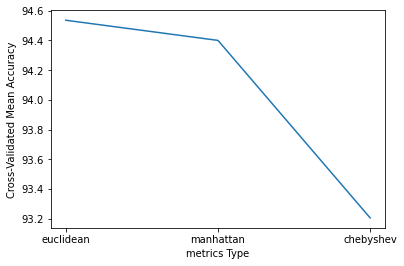

In [9]:
# Classifier implementing the k-nearest neighbors vote.
import gc

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


import matplotlib.pyplot as plt 
%matplotlib inline

metrics = ['euclidean', 'manhattan', 'chebyshev']
K=10
scores = []
for metric in metrics:
    print("--> Building model for {} metric".format(metric))
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=K, weights='uniform',metric=metric))
    model_scores = cross_val_score(model, X_pca, y_labels, cv=3, n_jobs=-1, scoring='accuracy')
    print(": Accuracy scores {}".format(model_scores))
    scores.append(model_scores.mean()*100)
    del model
    gc.collect()

plt.plot(metrics, scores)
plt.xlabel('metrics Type')
plt.ylabel('Cross-Validated Mean Accuracy')
plt.show()

<em><i> As can be seen from the figure above the best distance metric is the "euclidean" one.</i></em>

<h3> Search for the best number of neighbors using Cross Validation </h3>

--> Building model for 1 neighbors
: Accuracy scores [0.94171429 0.93942857 0.94264286]
--> Building model for 2 neighbors
: Accuracy scores [0.93657143 0.93735714 0.93585714]
--> Building model for 3 neighbors
: Accuracy scores [0.946      0.94621429 0.94671429]
--> Building model for 4 neighbors
: Accuracy scores [0.94707143 0.94771429 0.94821429]
--> Building model for 5 neighbors
: Accuracy scores [0.94757143 0.945      0.94735714]
--> Building model for 6 neighbors
: Accuracy scores [0.94692857 0.946      0.94628571]
--> Building model for 7 neighbors
: Accuracy scores [0.94735714 0.944      0.94671429]
--> Building model for 8 neighbors
: Accuracy scores [0.94714286 0.94542857 0.94614286]
--> Building model for 9 neighbors
: Accuracy scores [0.94671429 0.9445     0.94507143]


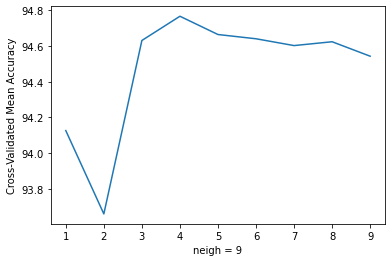

In [11]:
import gc

from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline


import matplotlib.pyplot as plt 
%matplotlib inline

neigh = [x for x in range(1,10)]
scores = []
for k in neigh:
    print("--> Building model for {} neighbors".format(k))
    model = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k, weights='uniform',metric='euclidean'))
    model_scores = cross_val_score(model, X_pca, y_labels, cv=3, n_jobs=-1, scoring='accuracy')
    print(": Accuracy scores {}".format(model_scores))
    scores.append(model_scores.mean()*100)
    del model
    gc.collect()

plt.plot(neigh, scores)
plt.xlabel(f"neigh = {k}")
plt.ylabel('Cross-Validated Mean Accuracy')
plt.show()

<em><i> As can be seen from the figure above the optimum number of neighbors is 4.</i></em>

<h3> Train and evaluate a Decision Tree using the previously determined optimum hyper-parameters </h3>

In [7]:
# 5-Fold Cross - Validation 
from sklearn.model_selection import cross_val_score
model = KNeighborsClassifier(n_neighbors=4, weights='uniform',metric='euclidean')
model_scores = cross_val_score(model, X_pca, y_labels, cv=5, n_jobs=-1, scoring='accuracy')

print("Accuracy scores {}".format(model_scores))
print("Mean accuracy {}".format(model_scores.mean()))

Accuracy scores [0.94880952 0.9502381  0.94666667 0.9477381  0.95011905]
Mean accuracy 0.9487142857142856


<h3> Train and Evaluate using Random Split using the previously determined optimum hyper-parameters </h3>

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_pca, y_labels, test_size=0.33, random_state=42)

In [12]:
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score

model = KNeighborsClassifier(n_neighbors=4, weights='uniform',metric='euclidean')
model.fit(X_train,y_train)

predictions = model.predict(X_test)
conf_matrix = confusion_matrix(y_test,predictions)

print(f" Accuracy Score: {accuracy_score(y_test, predictions)}\n")
print(" Confusion Matrix \n")
print(conf_matrix)

 Accuracy Score: 0.9479076479076479

 Confusion Matrix 

[[1320    0    2    1    1    2    6    0    0    1]
 [   0 1511    1    1    1    1    1    1    1    2]
 [   7    8 1349    3    3    4    5   21   11    3]
 [   6   10   13 1350    0   32    3    8   40    9]
 [   3    3    4    0 1289    2    6    1    1   49]
 [   1    5    6   44    1 1118   14    1    7    8]
 [  10    1    2    1    1    8 1370    0    4    0]
 [   0   15   12    4    9    2    1 1411    1   25]
 [   3    7    4   37    6   28   13    7 1220    9]
 [   7    5    3   21   60    8    3   36    5 1200]]


<h3> Evaluation Metrics:  Precision - Recall - F1_Score </h3>

In [14]:
from sklearn.metrics import precision_score
precision = precision_score(y_test, predictions, average='macro') # precision_score(y_true, y_pred, average='macro')

print('Macro precision score: {0:0.2f}'.format(
      precision))

Macro precision score: 0.95


In [15]:
from sklearn.metrics import recall_score
recall = recall_score(y_test, predictions, average='macro') 

print('Macro recall score: {0:0.2f}'.format(
      recall))

Macro recall score: 0.95


In [16]:
from sklearn.metrics import f1_score
f1_s = f1_score(y_test, predictions, average='macro')

print('Macro f1 score: {0:0.2f}'.format(
      f1_s))

Macro f1 score: 0.95


<h4> References </h4>

https://scikit-learn.org/stable/modules/neighbors.html#neighbors